# Creating a Makie Recipe for plotting DataFrames

In [6]:
using Pkg; Pkg.add("Makie")

using Makie
using CairoMakie
using CSV
using DataFrames

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.8/Project.toml`
  [ee78f7c6] + Makie v0.19.0
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [10]:
@recipe(DfPlot, df) do scene
    Attributes(
        x = :A,
        y = :B,
        c = :C,
        color = :red,
        colormap = :plasma,
        markersize = 20,
        marker = :rect,
        colorrange = (0,1),
        label = "",
    )
end

In [11]:

function Makie.plot!(p::DFPlot{<:Tuple{<:DataFrame}})
    df = p[:df][]
    x = getproperty(df, p[:x][])
    y = getproperty(df, p[:y][])
    c = getproperty(df, p[:c][])
    scatter!(p, x, y; color = c, markersize = p[:markersize][],
        colormap = p[:colormap][], marker = p[:marker][],
        colorrange = (minimum(x), maximum(c)), label = p[:label][])
    return p
end

In [12]:
df_recipe = DataFrame(A=randn(10), B=randn(10), C=rand(10))

Row,A,B,C
,Float64,Float64,Float64
1,-0.101585,-1.47521,0.770758
2,-1.41697,0.045451,0.711629
3,-0.140803,-2.12773,0.0371015
4,-0.727449,1.14972,0.566761
5,0.638977,0.694137,0.755767
6,0.0894785,0.291363,0.664991
7,-0.830929,0.242455,0.420261
8,0.0549152,1.13342,0.361081
9,-0.87581,0.160592,0.402891


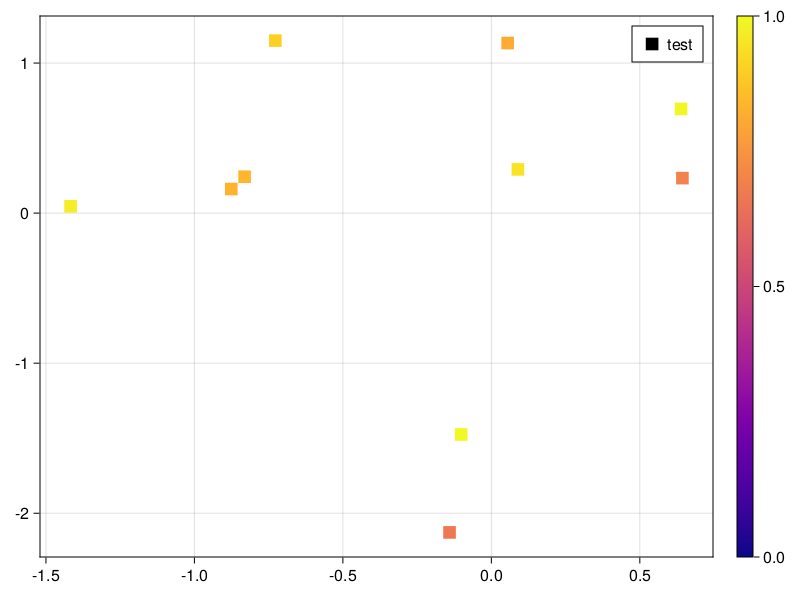

In [13]:
fig, ax, obj = dfplot(df_recipe; label="test")

axislegend()
Colorbar(fig[1,2], obj)
fig

We now have a dynamic way to do this:

In [14]:
df_names = DataFrame(a1=rand(100), a2=rand(100), a3=rand(100))

Row,a1,a2,a3
,Float64,Float64,Float64
1,0.25254,0.713603,0.00589525
2,0.516919,0.0914367,0.669646
3,0.10139,0.47854,0.996462
4,0.19841,0.683635,0.675369
5,0.0880771,0.533811,0.751586
6,0.463945,0.955898,0.548782
7,0.746687,0.45378,0.916555
8,0.0255143,0.0689084,0.726337
9,0.952076,0.707674,0.0297509


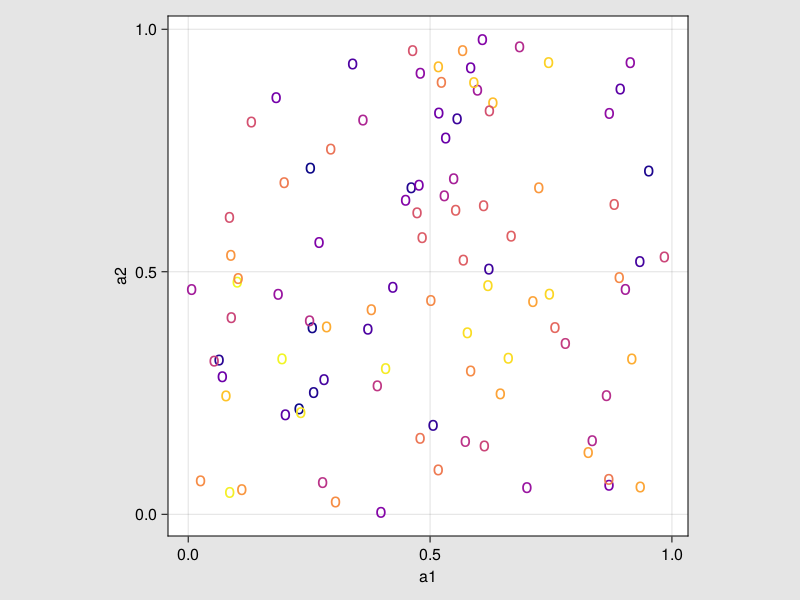

In [15]:
dfplot(df_names; x = :a1, y = :a2, c = :a3, marker = 'o',
    axis = (; aspect=1, xlabel = "a1", ylabel = "a2"),
    figure = (; backgroundcolor = :grey90))